Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np


from model_ARIMA import build_ARIMA_model, grid_search, grid_search_and_build_model
from model_naiv import build_naive_model
from test_mean import t_test, wilcoxon_test, binomial_test, kolmogorov_test
from test_correlation import residual_plot, acf_resid_plot, box_pierce_test, ljung_box_test, durbin_watson_test, breusch_godfrey_test, run_test
from test_variance import goldfeldquandt_test, breuschpagan_test, koenkerbasset_test
from test_normal import hist_plot, kolmogorov_test
from time_series import seasonal_plot, seasonal_subseries_plot, acf_plot, lag_plot, decompose, arima_residuals_for_all_stores, naive_residuals_for_all_stores
from dataset import clean, features, scatter_plot, boxplot


warnings.filterwarnings("ignore")

Datensatz lesen

In [2]:
try:
    df = pd.read_csv('Walmart_Sales.csv', parse_dates=['Date'], dayfirst=True)

except FileNotFoundError:
    print("Error: File not found. Please check the file path.")

except Exception as e:
    print("An error occurred while loading the dataset:", e)


df.columns = df.columns.str.lower()

Datensatz aufräumen

In [3]:
clean(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
All values in 'date' column are valid dates.
The data contains 0 duplicate values


Datensatz untersuchen

In [4]:
print(f'Der Datensatz enthält {df.shape[0]} Reihen und {df.shape[1]} Spalten')
df.describe()

Der Datensatz enthält 6435 Reihen und 8 Spalten


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


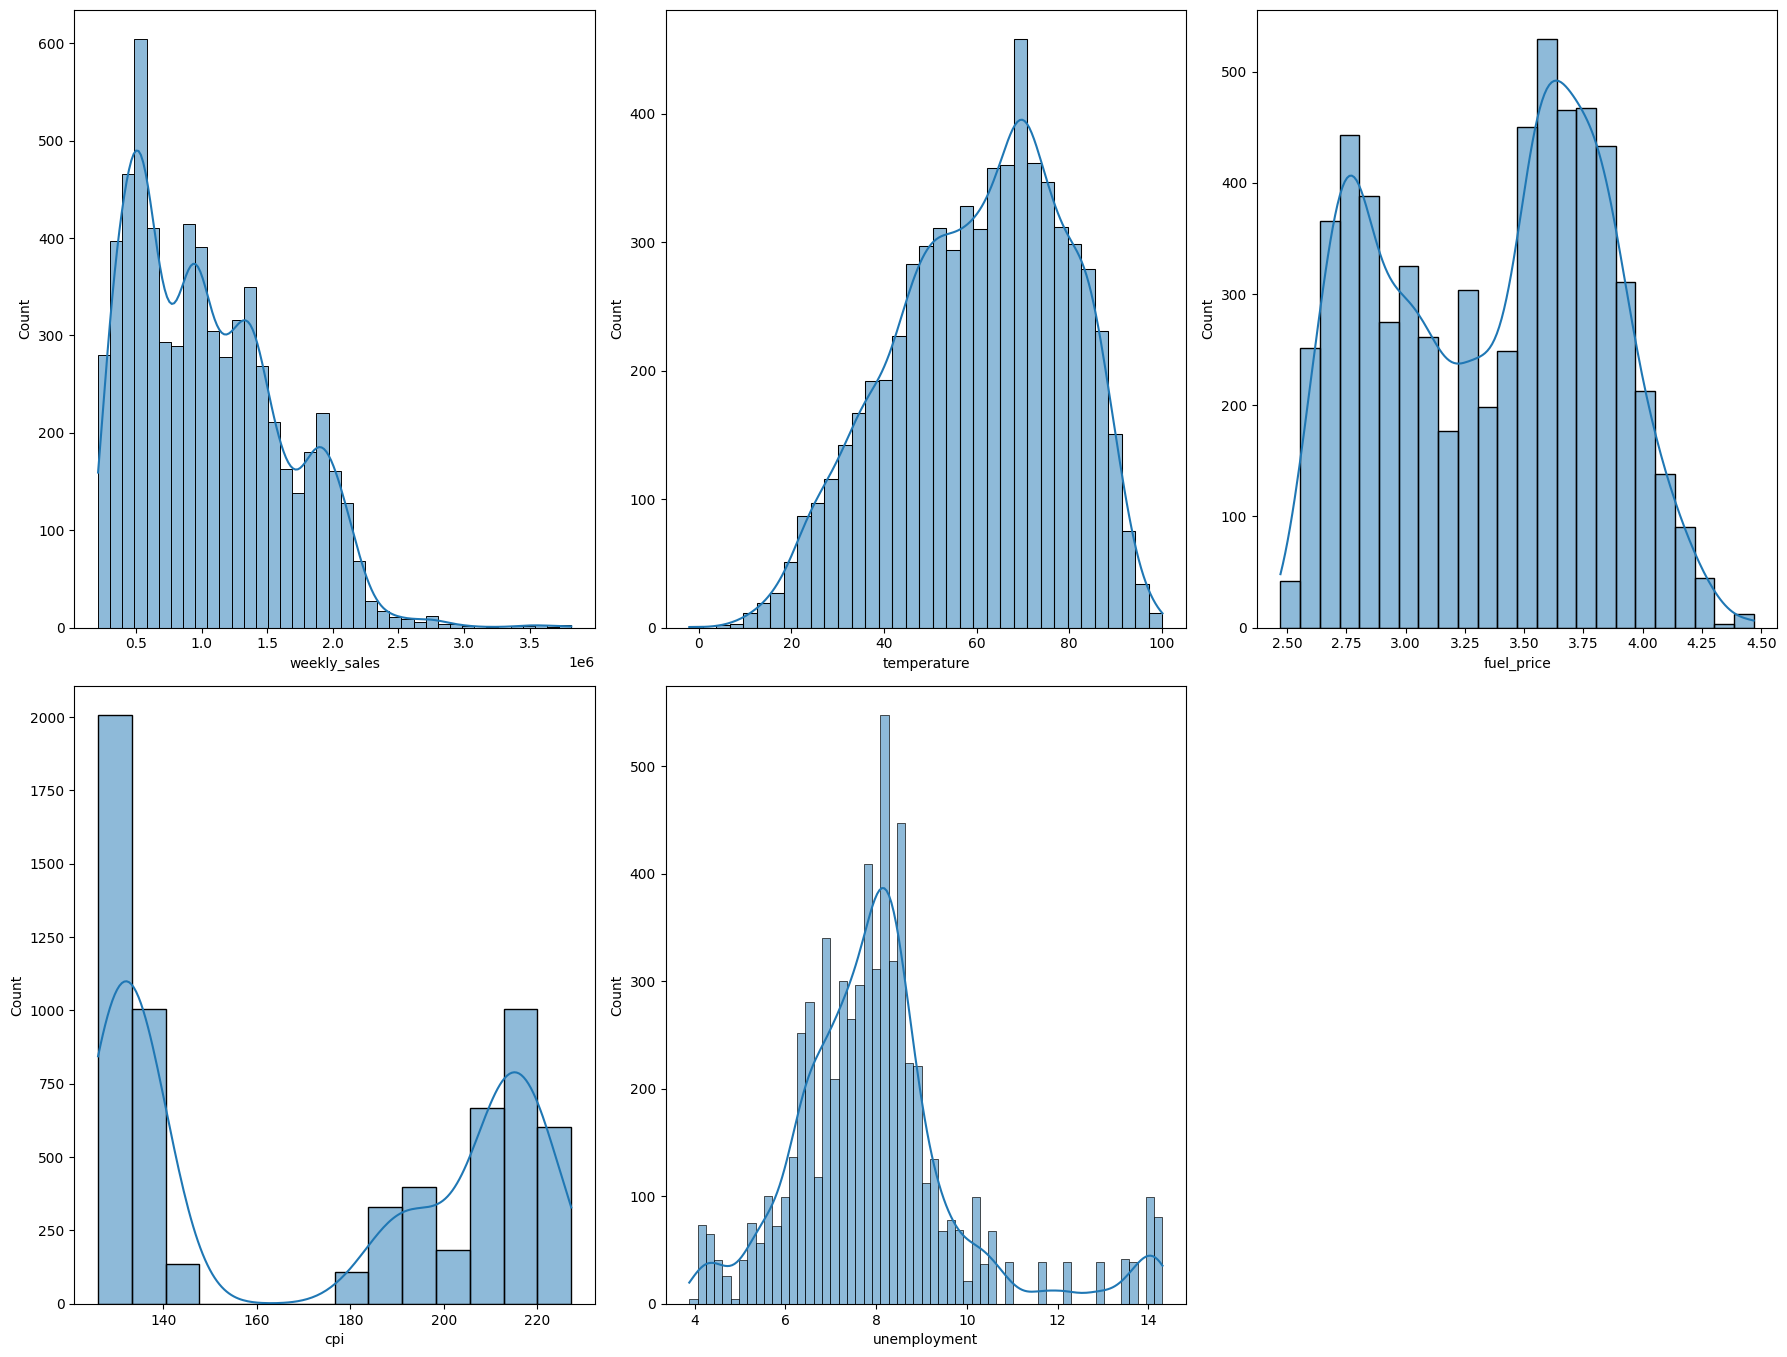

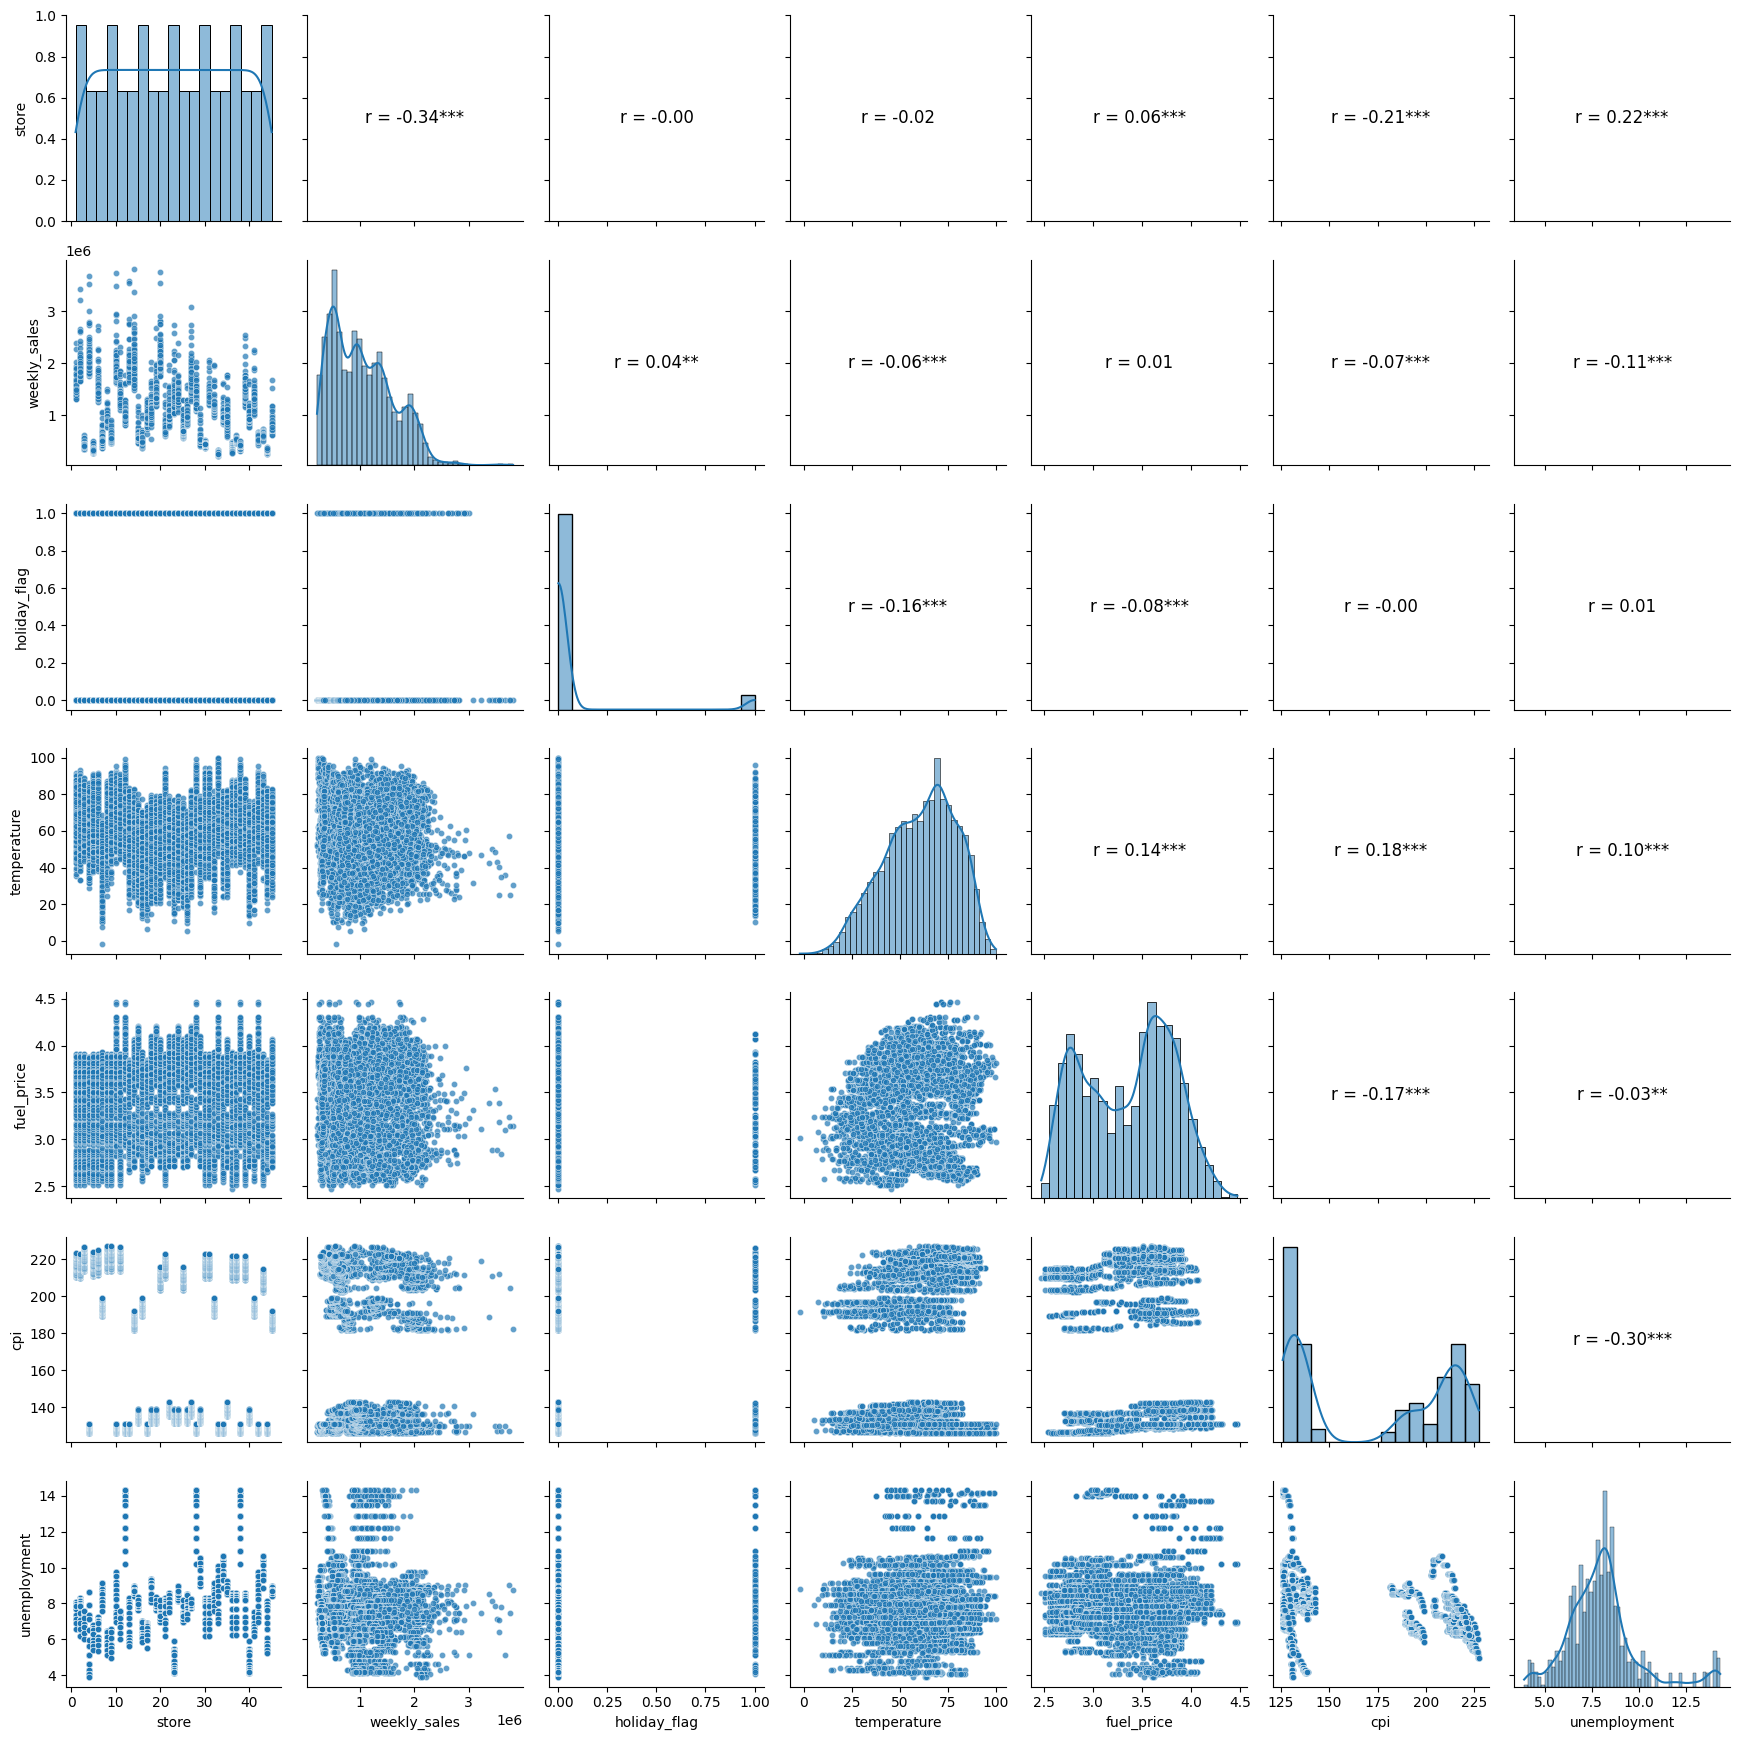

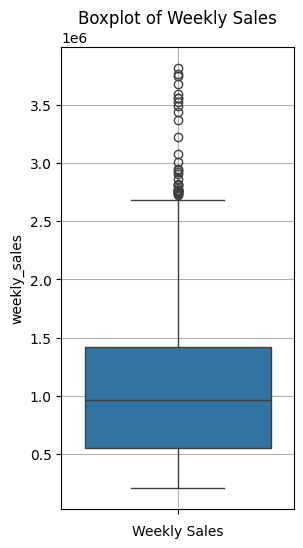

In [5]:
features(df)
scatter_plot(df)
boxplot(df)

1 Store auswählen

In [6]:
# Filtern nach Store
store_number = 2
store = df[df['store'] == store_number].copy()

# Datensatz nach Datum sortieren und als Index setzen
store.sort_values('date', inplace=True)
store.set_index('date', inplace=True)

# Nur die Spalte Weekly_Sales extrahieren
sales = store['weekly_sales']
sales = sales.asfreq('W-FRI')

Zeitreihe plotten

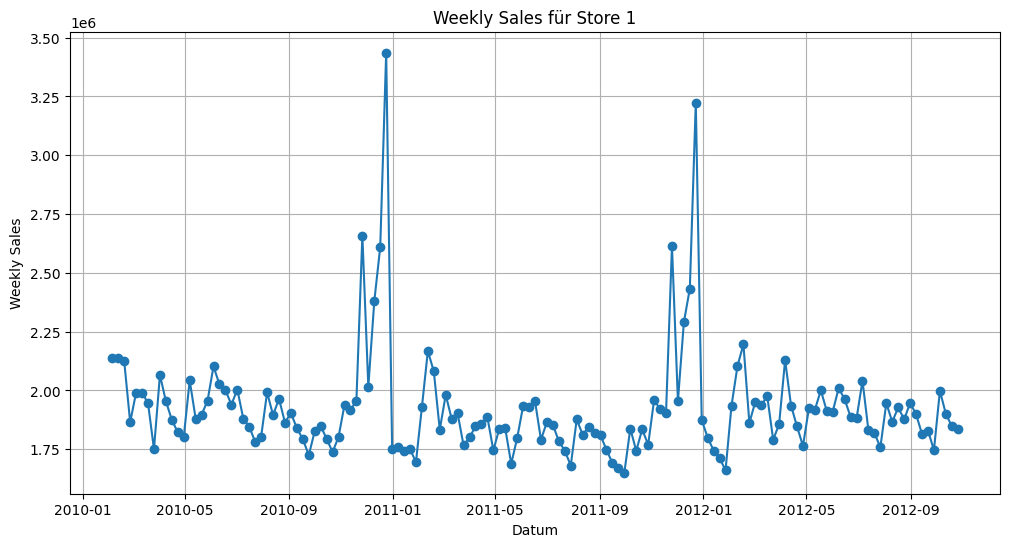

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(sales, marker='o', linestyle='-')
plt.title('Weekly Sales für Store 1')
plt.xlabel('Datum')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Seasonal

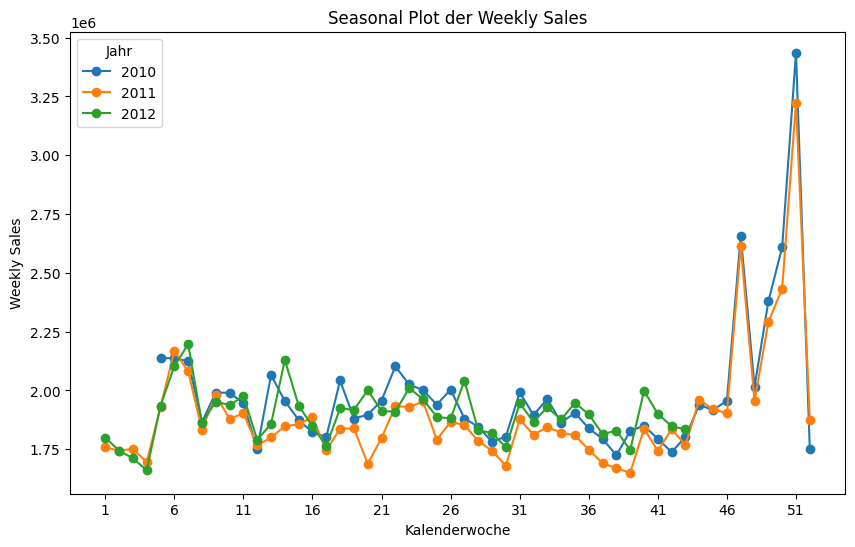

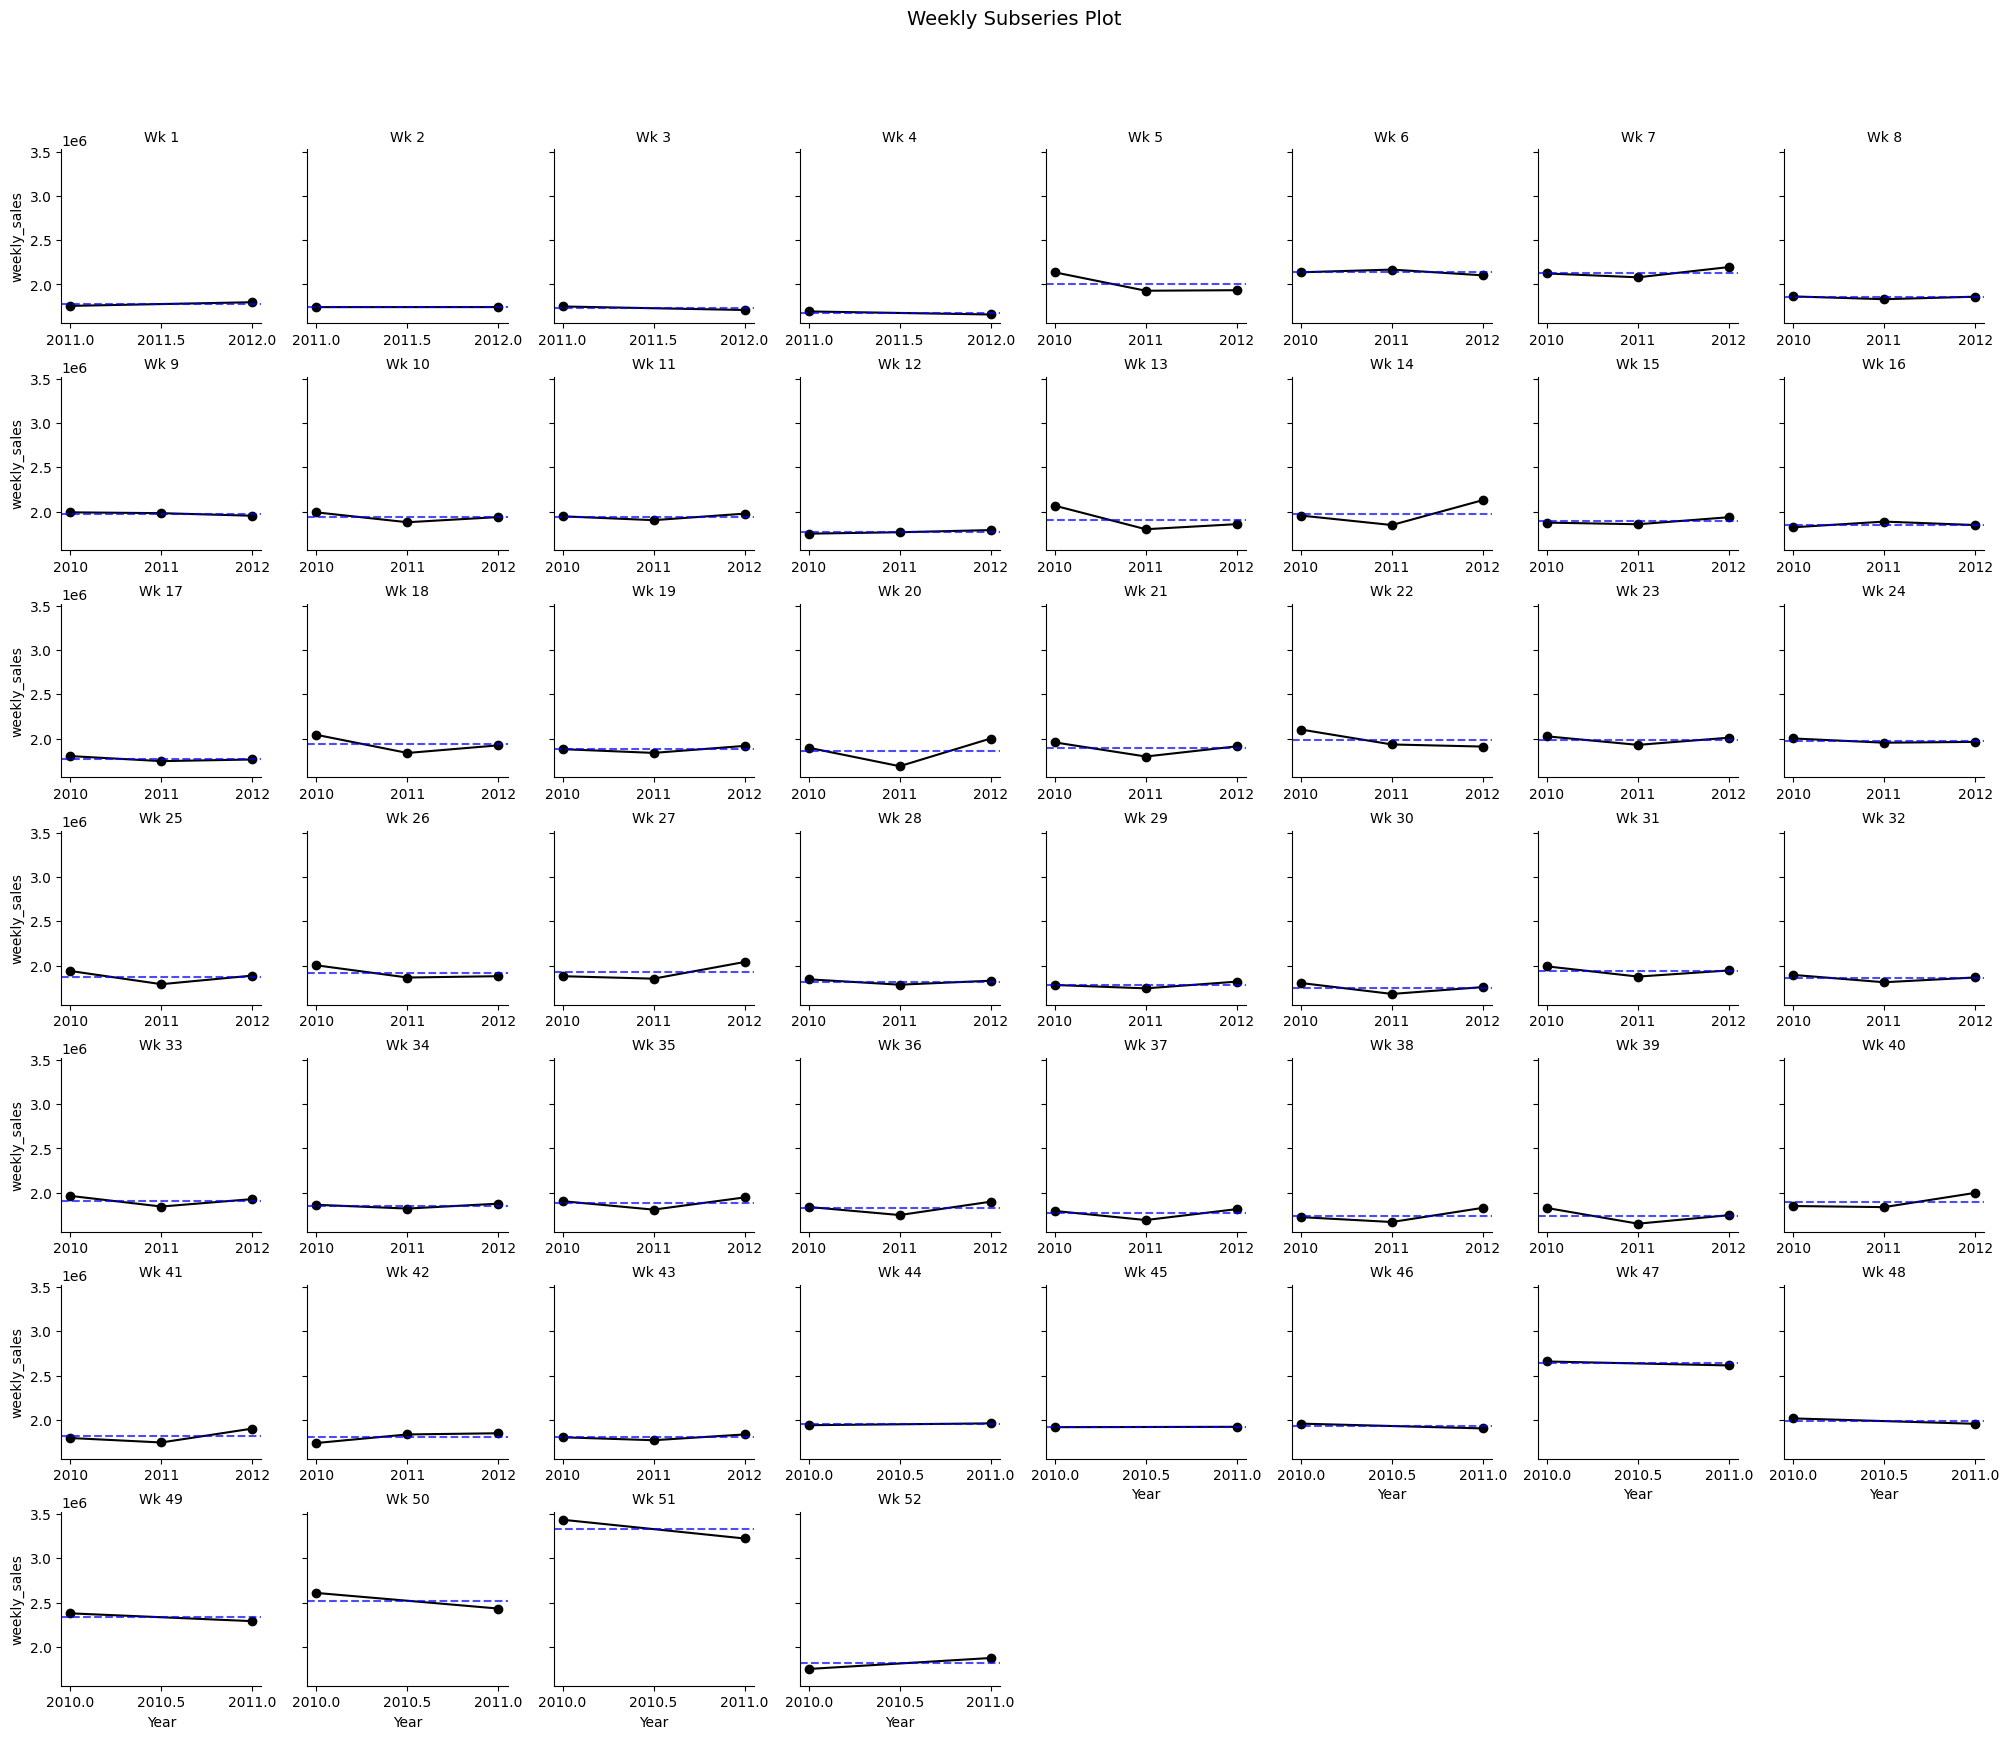

<Figure size 1200x600 with 0 Axes>

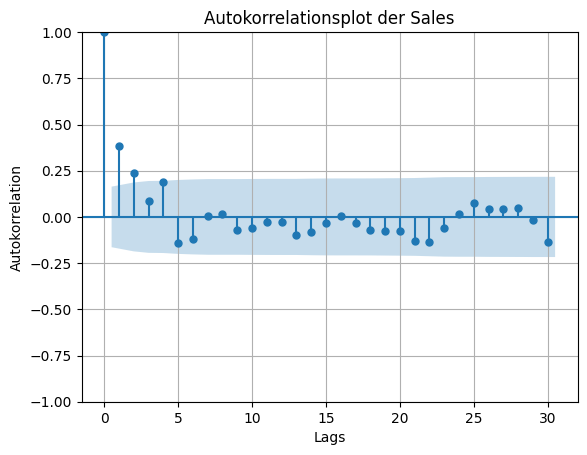

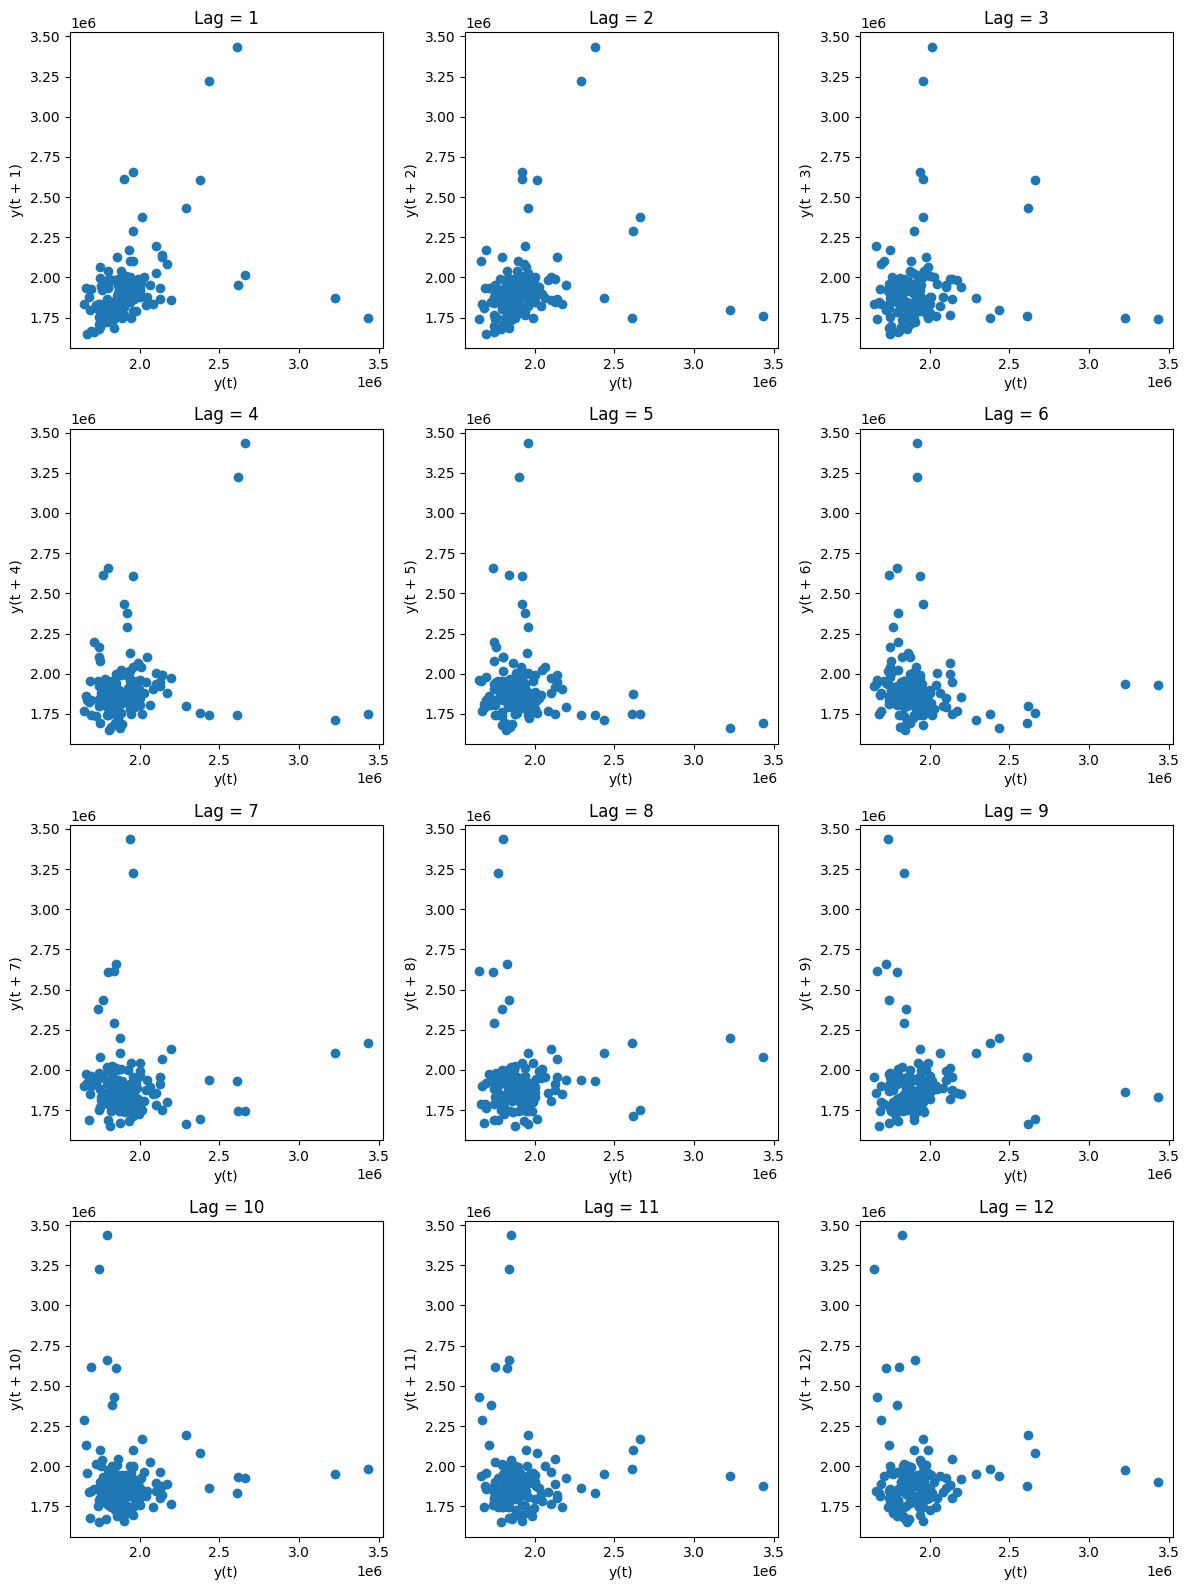

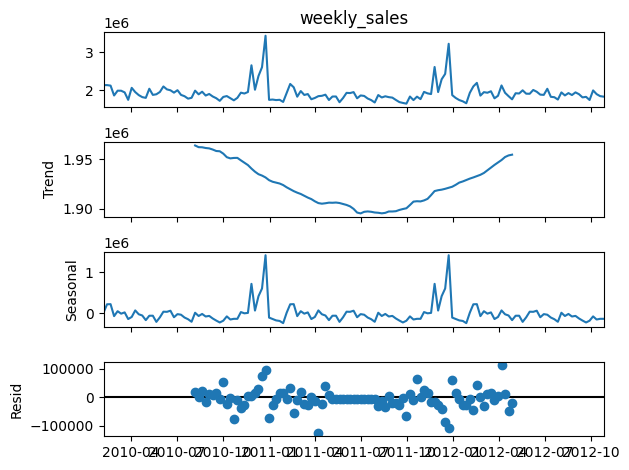

In [8]:
seasonal_plot(sales)
seasonal_subseries_plot(sales)
acf_plot(sales)
lag_plot(sales)
decompose(sales)

ARIMA Modell

In [9]:
arima_model = grid_search_and_build_model(sales)
arima_fitted = arima_model.fittedvalues
arima_resid = sales - arima_fitted


Bestes Modell: ARIMA(2, 0, 2) mit AIC: 3913.45


Naives Modell

In [10]:
naiv_resid, naiv_fitted = build_naive_model(sales)

Aussuchen

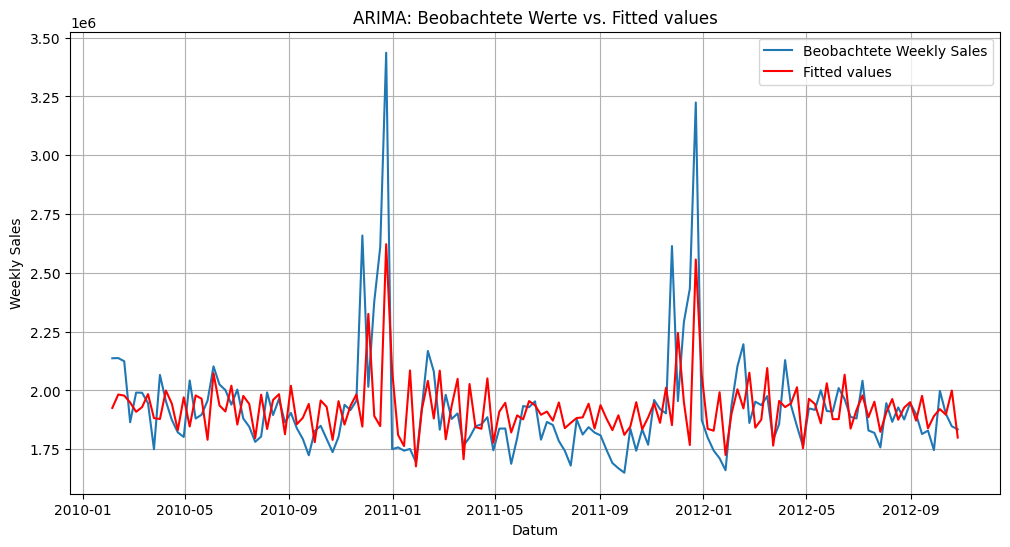

In [11]:
#residuen = naiv_resid
#fitted_values = naiv_fitted
residuen = arima_resid
fitted_values = arima_fitted


plt.figure(figsize=(12, 6))
plt.plot(sales, label='Beobachtete Weekly Sales')
plt.plot(fitted_values, color='red', label='Fitted values')
plt.title('ARIMA: Beobachtete Werte vs. Fitted values')
plt.xlabel('Datum')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

Tests

Mittelwert der Residuen: 600.4085


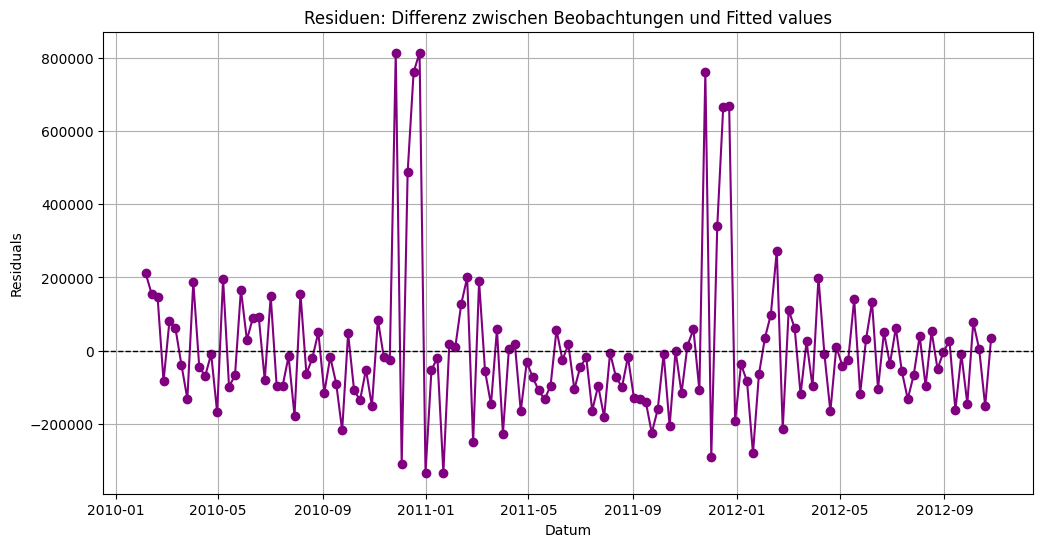

<Figure size 1200x600 with 0 Axes>

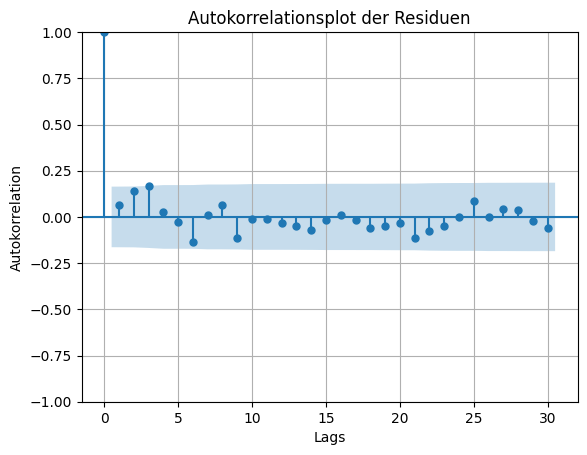

Box Pierce: 0.2389


In [12]:
mean_resid = residuen.mean()
print(f"Mittelwert der Residuen: {mean_resid:.4f}")
residual_plot(residuen)
acf_resid_plot(residuen)
bp_stat, bp_pvalue = box_pierce_test(residuen)
print(f"Box Pierce: {bp_pvalue:.4f}")

Alle Residuen berechnen

In [30]:
residuals_dict = arima_residuals_for_all_stores('Walmart_Sales.csv')
#residuals_dict = naive_residuals_for_all_stores('Walmart_Sales.csv')


Bestes Modell: ARIMA(2, 0, 2) mit AIC: 3802.21

Bestes Modell: ARIMA(2, 0, 2) mit AIC: 3913.45

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 3423.76

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 3939.38

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 3395.85

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 3878.33

Bestes Modell: ARIMA(2, 1, 2) mit AIC: 3633.36

Bestes Modell: ARIMA(2, 0, 2) mit AIC: 3693.93

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 3557.91

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 3967.09

Bestes Modell: ARIMA(2, 0, 2) mit AIC: 3805.30

Bestes Modell: ARIMA(2, 0, 2) mit AIC: 3760.29

Bestes Modell: ARIMA(2, 0, 2) mit AIC: 3946.05

Bestes Modell: ARIMA(2, 1, 2) mit AIC: 3967.18

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 3713.16

Bestes Modell: ARIMA(2, 1, 2) mit AIC: 3579.74

Bestes Modell: ARIMA(1, 0, 2) mit AIC: 3715.74

Bestes Modell: ARIMA(2, 1, 1) mit AIC: 3822.04

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 3862.94

Bestes Modell: ARIMA(2, 1, 2) mit AIC: 3958.58

Bestes Modell: ARIMA(1, 1, 1) mit AIC: 

Correlation Tests

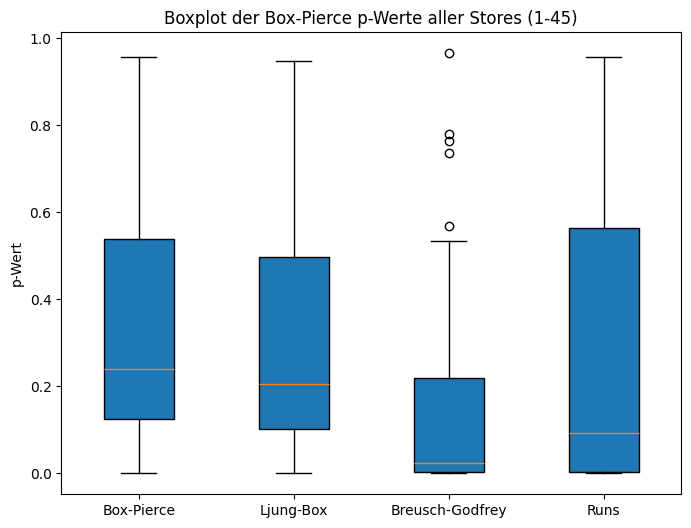

[0.6399849588989905, 0.2389457012800705, 0.44748167176670395, 0.22271095222317994, 0.20712062435117812, 0.14526131012452387, 0.3492586521385485, 0.3987508358597975, 0.1299114355612453, 0.15764313712247813, 0.5375945450817302, 0.3634998414614763, 0.50020088816467, 0.4093176033945189, 0.05000619671251146, 0.7606241246281114, 0.685612507187871, 0.12506103549995332, 0.21034273726189978, 0.5388125865687885, 0.0685692219117995, 0.03404783182249415, 0.6079798707905987, 0.7262673964713631, 0.23506053828843262, 0.551522228835674, 0.5518167581116518, 0.137507480591138, 0.018682479752082908, 0.0007149868316044964, 0.0036579909543876564, 0.2800730997786101, 0.09981858148210784, 0.38734524016156613, 0.057766721774919844, 0.7719497950075966, 0.956400818332774, 2.4430499862636653e-22, 0.06211895333774893, 0.792523219888654, 0.14413387012652082, 0.15571450384678495, 6.540663770622827e-14, 0.34588890863291705, 0.2894508686484211]


In [ ]:
bp_pvalues = []
lb_pvalues = []
bg_pvalues = []
rt_pvalues = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    resid = residuals_dict.get(store)
    if resid is not None:
        # Box-Pierce Test
        try:
            _, p_value = box_pierce_test(resid, lags=[10])
            bp_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Box-Pierce Test für Store {store}: {e}")
            bp_pvalues.append(np.nan)
        # Ljung-Box Test
        try:
            _, p_value = ljung_box_test(resid, lags=[10])
            lb_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Ljung-Box Test für Store {store}: {e}")
            lb_pvalues.append(np.nan)
        # Breusch-Godfrey Test
        try:
            _, p_value = breusch_godfrey_test(resid, lags=10)
            bg_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Breusch-Godfrey Test für Store {store}: {e}")
            bg_pvalues.append(np.nan)
        # Runs Test
        try:
            _, p_value = run_test(resid)
            rt_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Runs Test für Store {store}: {e}")
            rt_pvalues.append(np.nan)
    else:
        bp_pvalues.append(np.nan)
        lb_pvalues.append(np.nan)
        bg_pvalues.append(np.nan)
        rt_pvalues.append(np.nan)


pvalues = np.column_stack([bp_pvalues, lb_pvalues, bg_pvalues, rt_pvalues])


# Erstelle einen Boxplot der p-Werte
plt.figure(figsize=(8, 6))
plt.boxplot(pvalues, patch_artist=True)
plt.title("Boxplot der Correlation p-Werte aller Stores (1-45)")
plt.ylabel("p-Wert")
plt.xticks([1, 2, 3, 4], ["Box-Pierce", "Ljung-Box", "Breusch-Godfrey", "Runs"])
plt.show()

print(bp_pvalues)

Durbin Watson

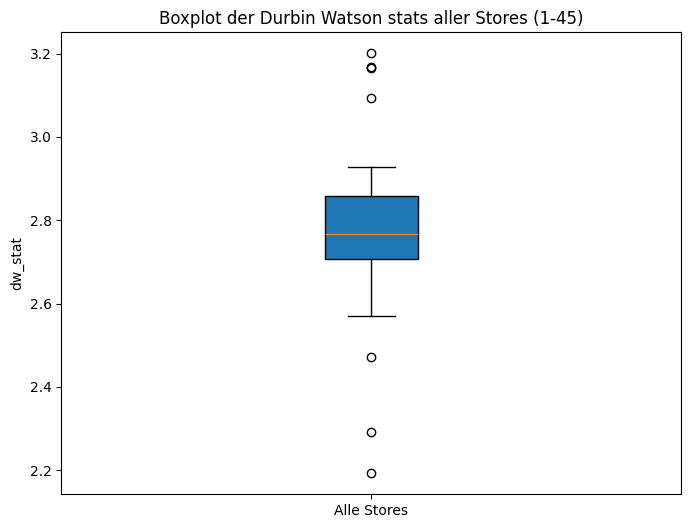

[2.751232724925425, 2.7679447550960545, 2.70794711930034, 2.785954482119405, 2.8281949211677166, 2.6705925589858923, 2.616043094128576, 2.7767684966688173, 2.741654827376988, 2.709379399298398, 2.6680632956972574, 2.7734108637181603, 2.7631084426875634, 2.8773077654428936, 2.7014165476572822, 2.57087593075364, 3.1671557163023154, 2.816966813470863, 2.727106429174113, 2.732035743534923, 2.6021977462988954, 2.750065871348965, 2.5810996319577315, 2.7767705525747073, 2.604333651603585, 2.8671831010976816, 2.863457649629558, 2.926705965071621, 2.73579171129304, 3.0937292639611074, 2.8654135999410557, 2.829917186659994, 2.2925891410451347, 2.8574772734764293, 2.8124180885849728, 2.4721788388293398, 3.1658762958583155, 2.8588288548431855, 2.7885958497164007, 2.9087658869321933, 2.9016429818382057, 2.1924237175987815, 2.7069372210805516, 3.2008885492647647, 2.7376521072094158]


In [ ]:
dw_stats = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    resid = residuals_dict.get(store)
    if resid is not None:
        try:
            dw_stat = durbin_watson_test(resid)
            dw_stats.append(dw_stat)
        except Exception as e:
            print(f"Fehler beim Durbin Watson Test für Store {store}: {e}")
            dw_stats.append(np.nan)
    else:
        dw_stats.append(np.nan)

# Erstelle einen Boxplot der p-Werte
plt.figure(figsize=(8, 6))
plt.boxplot(dw_stats, patch_artist=True)
plt.title("Boxplot der Durbin Watson stats aller Stores (1-45)")
plt.ylabel("dw_stat")
plt.xticks([1], ["Alle Stores"])
plt.show()

print(dw_stats)

Mittelwert Tests

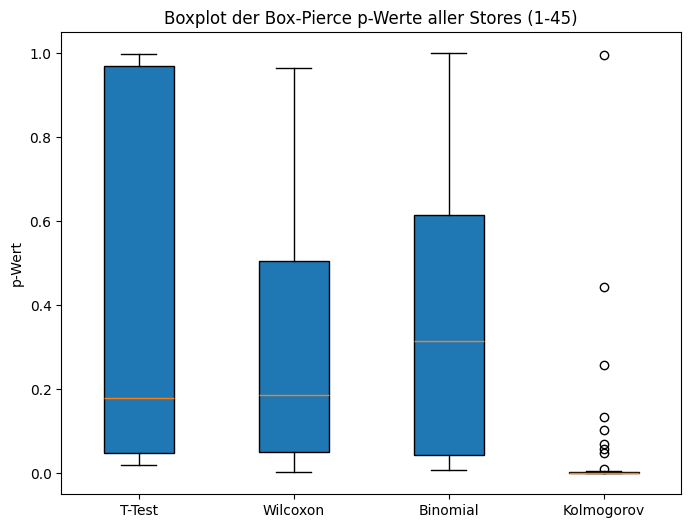

In [ ]:
t_pvalues = []
w_pvalues = []
b_pvalues = []
k_pvalues = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    resid = residuals_dict.get(store)
    if resid is not None:
        # T-Test
        try:
            _, p_value = t_test(resid)
            t_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim t-Test für Store {store}: {e}")
            t_pvalues.append(np.nan)
        # Wilcoxon Test
        try:
            _, p_value = wilcoxon_test(resid)
            w_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Wilcoxon Test für Store {store}: {e}")
            w_pvalues.append(np.nan)
        # Binomial Test
        try:
            _, _, p_value = binomial_test(resid)
            b_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Binomial Test für Store {store}: {e}")
            b_pvalues.append(np.nan)
        # Kolmogorov Test
        try:
            _, p_value = kolmogorov_test(resid)
            k_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Kolmogorov Test für Store {store}: {e}")
            k_pvalues.append(np.nan)
    else:
        t_pvalues.append(np.nan)
        w_pvalues.append(np.nan)
        b_pvalues.append(np.nan)
        k_pvalues.append(np.nan)


pvalues = np.column_stack([t_pvalues, w_pvalues, b_pvalues, k_pvalues])


# Erstelle einen Boxplot der p-Werte
plt.figure(figsize=(8, 6))
plt.boxplot(pvalues, patch_artist=True)
plt.title("Boxplot der Mittelwert p-Werte aller Stores (1-45)")
plt.ylabel("p-Wert")
plt.xticks([1, 2, 3, 4], ["T-Test", "Wilcoxon", "Binomial", "Kolmogorov"])
plt.show()

